# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [1]:
# If on colab, uncomment the following lines

# ! wget https://raw.githubusercontent.com/girafe-ai/ml-course/22f_made/homeworks/lab01_ml_pipeline/car_data.csv

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [2]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,737,105,51,93,160,51,7,217,30,24,165,240,703,208,81,9,25,188,188
1,544,88,43,70,177,74,19,152,44,19,143,180,342,168,76,1,9,186,189
2,154,89,40,79,154,64,9,144,46,19,139,168,311,149,71,8,7,188,197
3,510,86,43,70,126,56,6,148,46,19,145,166,317,171,86,6,9,179,182
4,299,98,40,77,171,61,6,172,37,21,139,197,457,141,72,4,17,199,201
5,593,89,43,77,147,54,8,144,46,19,146,163,308,174,64,13,5,194,201
6,19,101,56,100,215,69,10,208,32,24,169,227,651,223,74,6,5,186,193
7,110,89,40,77,159,65,9,144,46,19,141,168,314,143,70,0,5,190,200
8,459,98,42,90,192,61,9,178,37,21,144,189,480,138,61,3,8,199,208
9,49,91,45,79,176,59,9,163,40,20,148,184,404,179,62,0,10,199,208


Methods `describe` and `info` deliver some useful information.

In [3]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,418.746812,93.987250,45.249545,82.761384,171.276867,62.227687,8.732240,170.557377,40.528233,20.710383,148.830601,190.486339,449.087432,176.710383,72.750455,6.429872,12.817851,188.952641,195.624772
std,241.163148,8.331073,6.117585,16.010588,34.676343,8.863373,5.438716,33.572817,7.863898,2.630864,14.312164,32.118711,178.908398,32.583496,7.987537,4.839495,8.855056,6.078977,7.404711
min,0.000000,73.000000,33.000000,40.000000,104.000000,47.000000,2.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,109.000000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,216.000000,88.000000,40.000000,70.000000,144.000000,57.000000,6.000000,148.000000,33.000000,19.000000,138.000000,168.000000,321.000000,152.000000,68.000000,3.000000,6.000000,185.000000,191.000000
50%,418.000000,93.000000,45.000000,80.000000,170.000000,62.000000,8.000000,158.000000,42.000000,20.000000,147.000000,180.000000,367.000000,176.000000,71.000000,6.000000,11.000000,189.000000,197.000000
75%,627.000000,100.000000,51.000000,98.000000,197.000000,66.000000,10.000000,201.000000,46.000000,23.000000,160.000000,219.000000,611.000000,200.000000,76.000000,9.000000,19.000000,193.000000,201.000000
max,843.000000,119.000000,58.000000,112.000000,333.000000,138.000000,55.000000,265.000000,61.000000,29.000000,182.000000,320.000000,1018.000000,268.000000,135.000000,22.000000,38.000000,203.000000,211.000000


In [4]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       549 non-null    int32
 1   1       549 non-null    int32
 2   2       549 non-null    int32
 3   3       549 non-null    int32
 4   4       549 non-null    int32
 5   5       549 non-null    int32
 6   6       549 non-null    int32
 7   7       549 non-null    int32
 8   8       549 non-null    int32
 9   9       549 non-null    int32
 10  10      549 non-null    int32
 11  11      549 non-null    int32
 12  12      549 non-null    int32
 13  13      549 non-null    int32
 14  14      549 non-null    int32
 15  15      549 non-null    int32
 16  16      549 non-null    int32
 17  17      549 non-null    int32
 18  18      549 non-null    int32
dtypes: int32(19)
memory usage: 40.9 KB


### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

In [12]:
import scikitplot
import sklearn
from sklearn import *
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

In [13]:
unique, counts = np.unique(y_train, return_counts=True)
dict(zip(unique, counts))

{'bus': 152, 'opel': 134, 'saab': 137, 'van': 126}

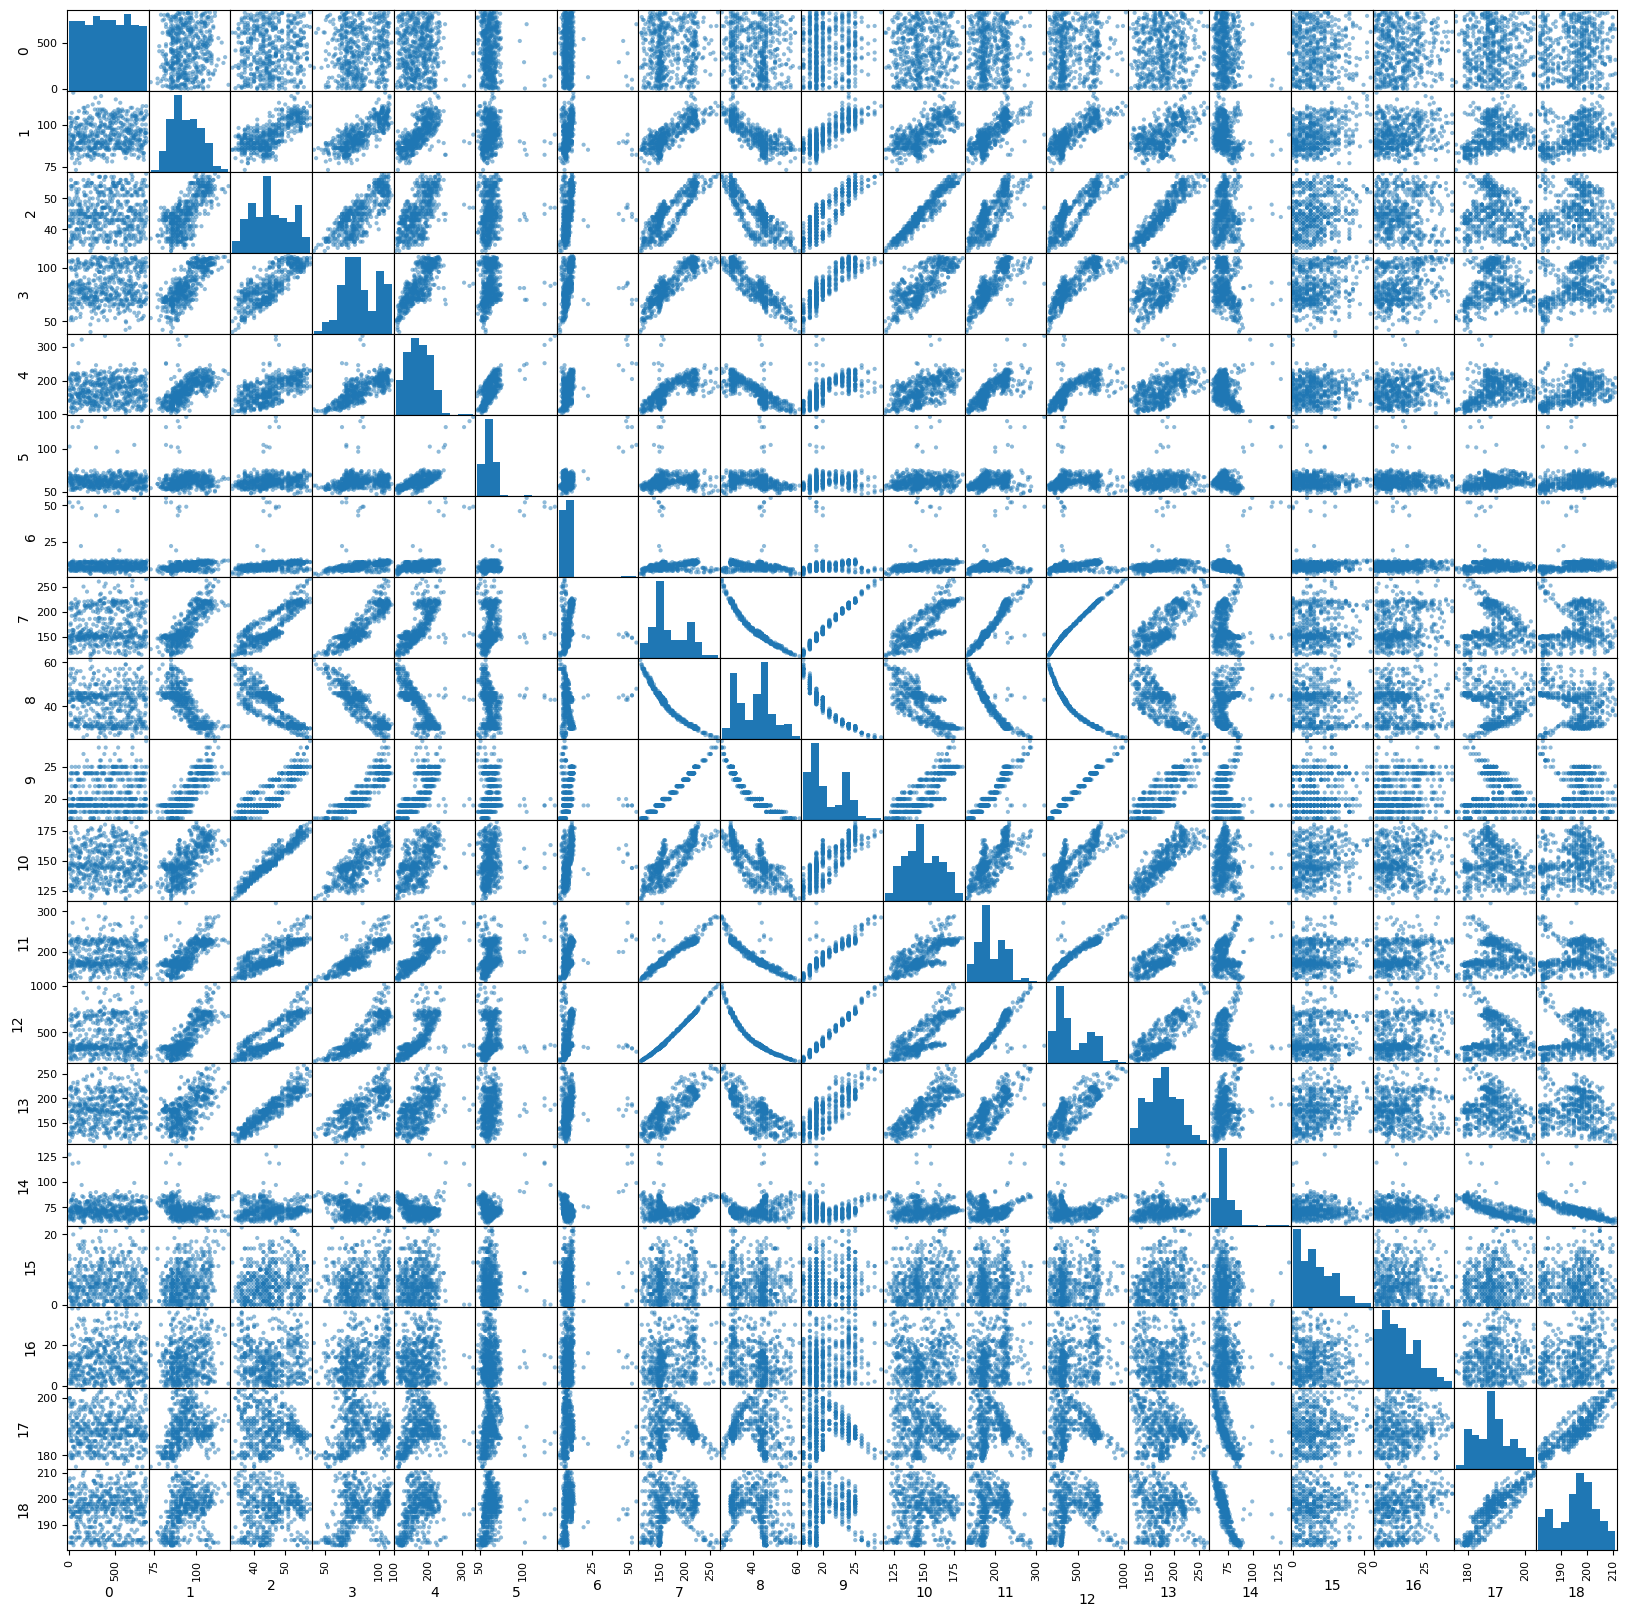

In [14]:
scatter_matrix(X_train_pd, figsize=(20, 20))
plt.show()

So, lets try with 7, 8, 9, 12

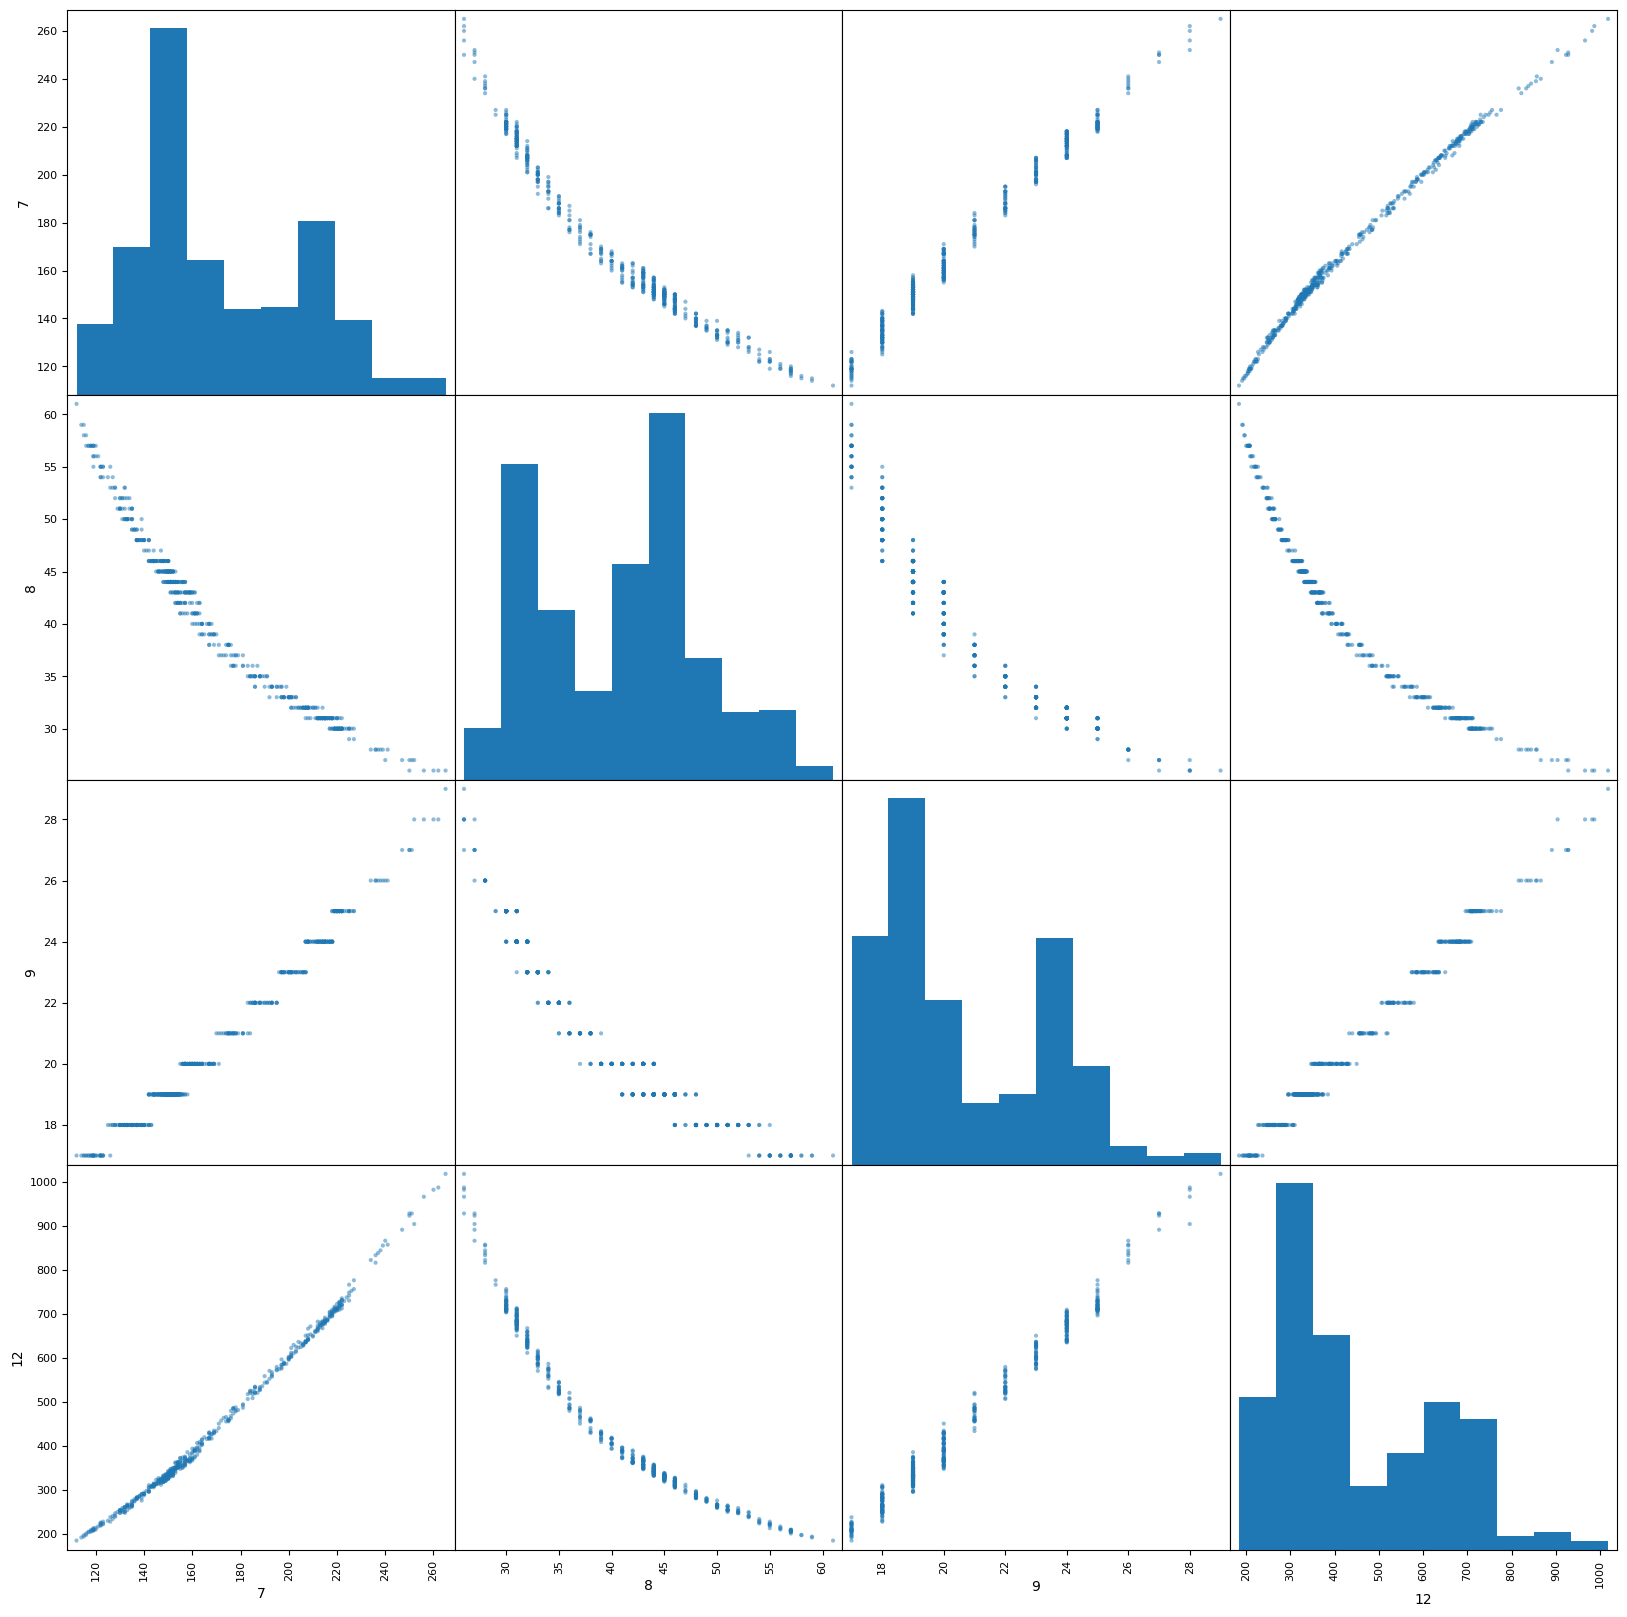

In [15]:
features_idx = [7, 8, 9, 12]
scatter_matrix(X_train_pd[features_idx], figsize=(20, 20))
plt.show()

Now we can see that data is unscaled. Let's scaled this peace of data:

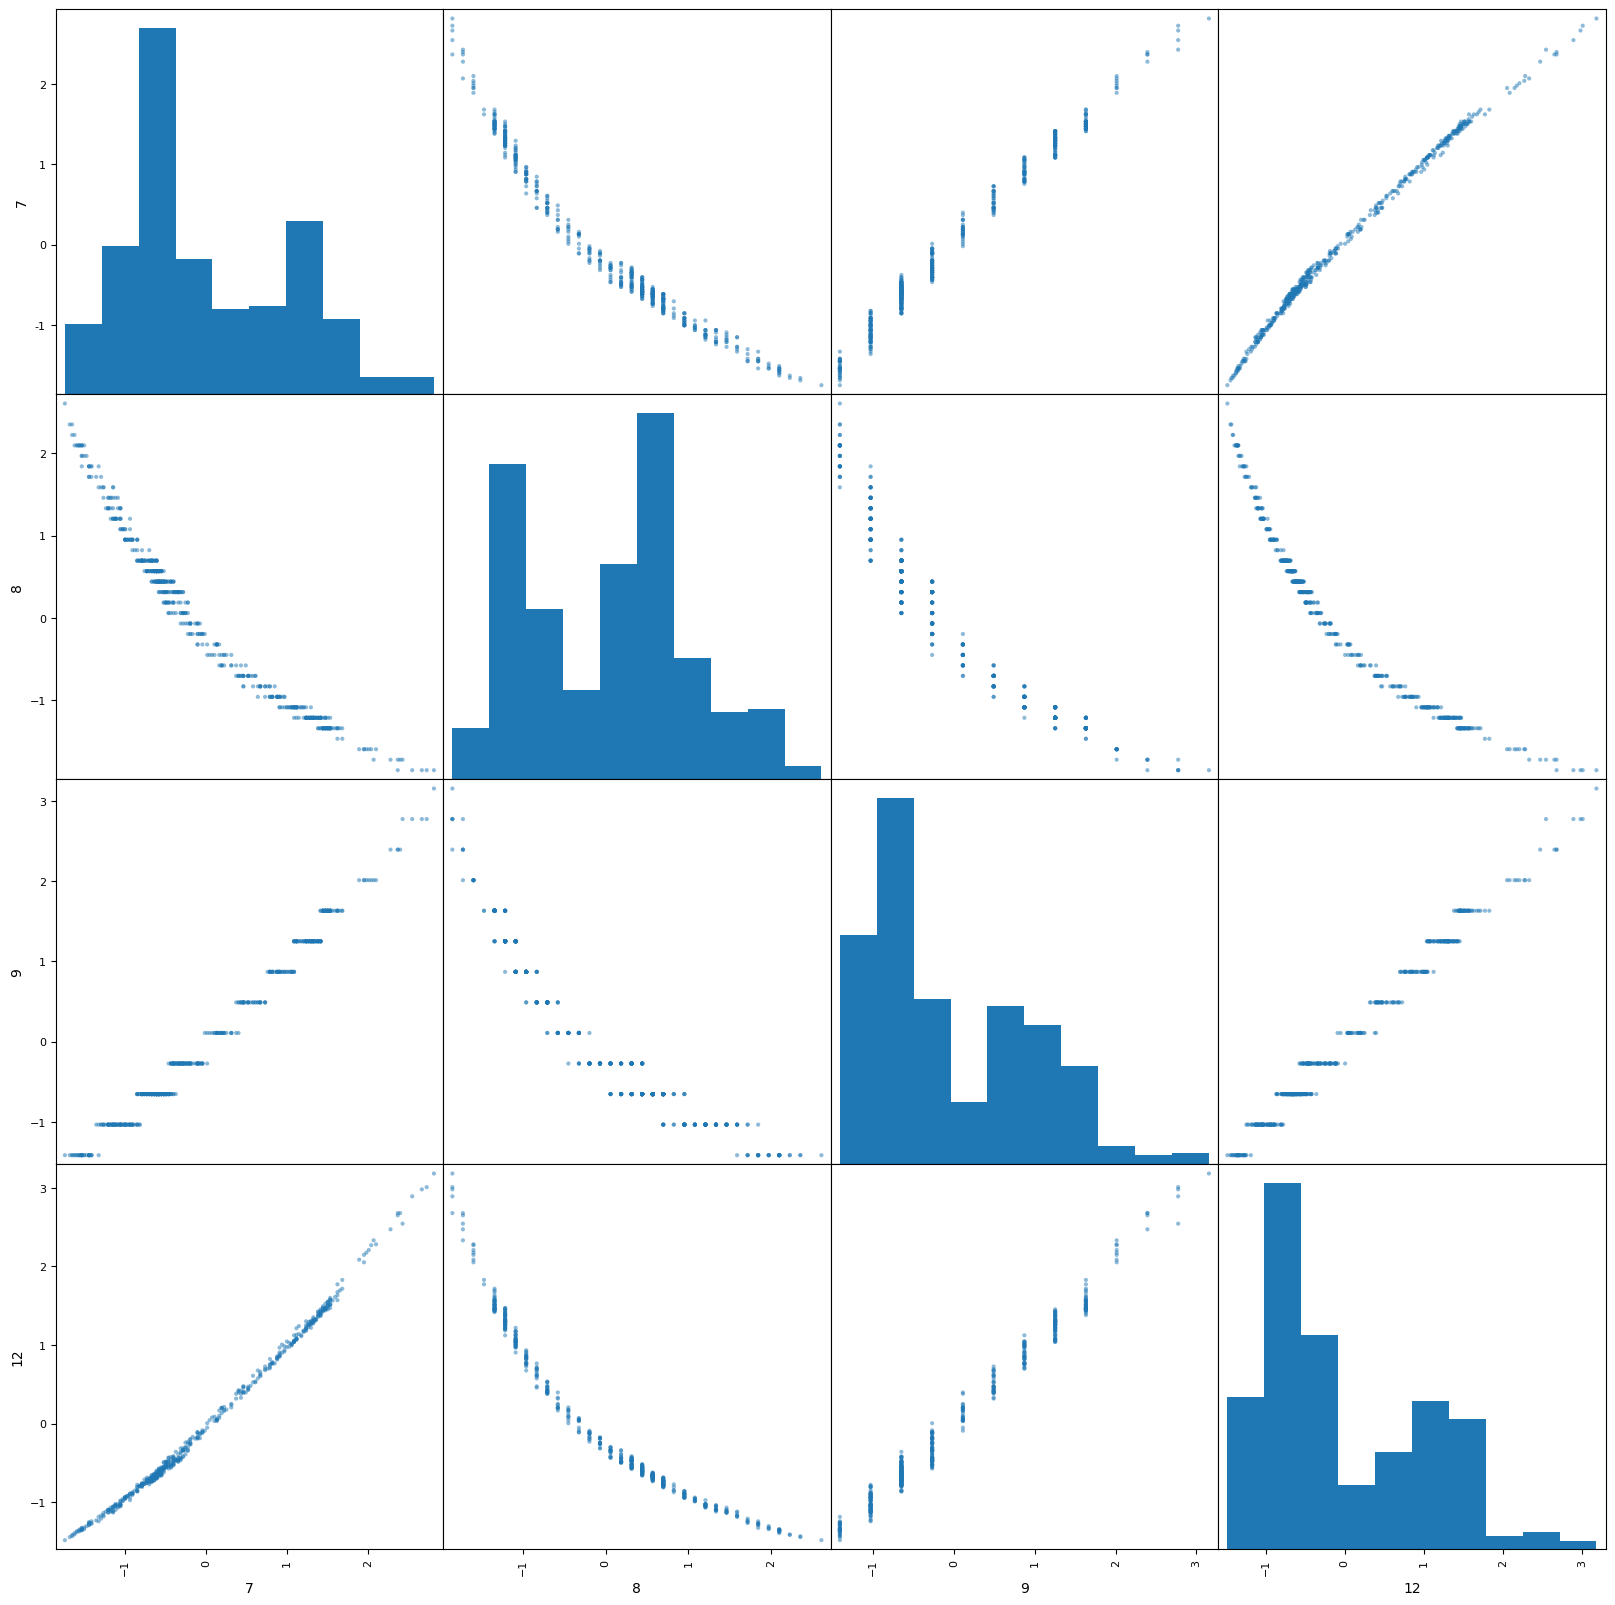

In [16]:
scaler = sklearn.preprocessing.StandardScaler()
X_train_scaled, X_test_scaled = scaler.fit_transform(X_train), scaler.transform(X_test)

scatter_matrix(pd.DataFrame(X_train_scaled)[features_idx], figsize=(20, 20))
plt.show()

#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

In [19]:
LogRegEstimator = sklearn.linear_model.LogisticRegression(penalty='elasticnet', solver='saga', multi_class='multinomial', max_iter= 1000, tol=1e-3, random_state=1488)
LogRegEstimator.get_params().keys()

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])

In [21]:
param_grid = {'C': np.linspace(10, 90, 10), 'l1_ratio': np.linspace(0, 1, 20)}
LogRegOptimizer = sklearn.model_selection.GridSearchCV(LogRegEstimator, param_grid, n_jobs=-1)

LogRegOptimizer.fit(X_train_scaled, y_train)
print(LogRegOptimizer.best_params_)

{'C': 18.88888888888889, 'l1_ratio': 0.6842105263157894}


In [22]:
LogRegClsf = sklearn.linear_model.LogisticRegression(penalty='elasticnet', tol=1e-3, solver='saga', C=LogRegOptimizer.best_params_['C'], max_iter=1000, multi_class='multinomial', l1_ratio=LogRegOptimizer.best_params_['l1_ratio'], n_jobs=-1, random_state=1488).fit(X_train_scaled, y_train)

proba_test = LogRegClsf.predict_proba(X_test_scaled)
prediction = LogRegClsf.predict(X_test_scaled)

print("accuracy =", sklearn.metrics.accuracy_score(y_test, prediction))
print("f1 =", sklearn.metrics.f1_score(y_test, prediction, average='macro'))

accuracy = 0.8215488215488216
f1 = 0.8266600534453049


In [23]:
print(sklearn.metrics.classification_report(y_test, prediction))

              precision    recall  f1-score   support

         bus       0.89      0.95      0.92        66
        opel       0.71      0.68      0.69        78
        saab       0.73      0.71      0.72        80
         van       0.97      0.97      0.97        73

    accuracy                           0.82       297
   macro avg       0.82      0.83      0.83       297
weighted avg       0.82      0.82      0.82       297



<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

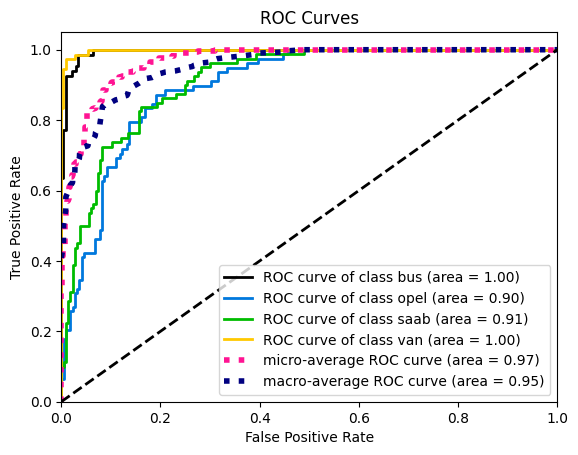

In [24]:
scikitplot.metrics.plot_roc(y_test, proba_test)

#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot. 

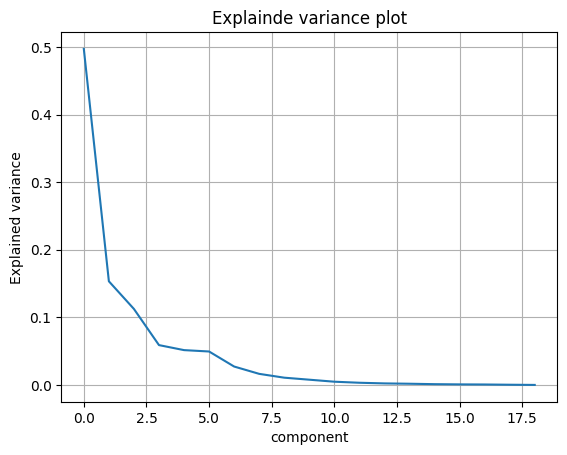

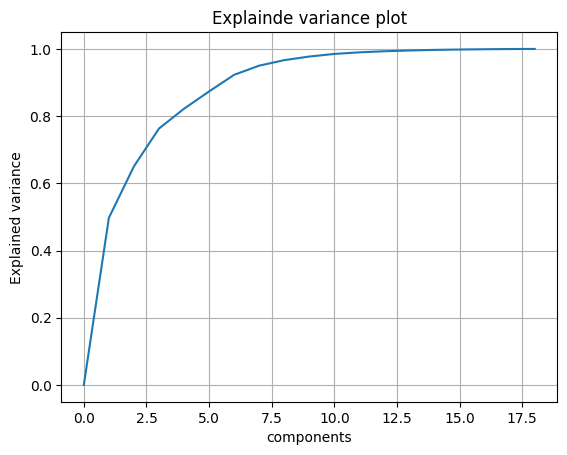

In [25]:
pca = sklearn.decomposition.PCA(random_state=1488)
X_train_pca = pca.fit(X_train_scaled)
ExpVarPCA = pca.explained_variance_ratio_
plt.plot(ExpVarPCA)
plt.title('Explainde variance plot')
plt.xlabel('component')
plt.ylabel('Explained variance')
plt.grid(':')
plt.show()

plt.plot([np.sum(ExpVarPCA[:i]) for i in range(len(ExpVarPCA))])
plt.title('Explainde variance plot')
plt.xlabel('components')
plt.ylabel('Explained variance')
plt.grid(':')
plt.show()

#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

In [27]:
sigmas = [0.68, 0.95, 0.997]

for sigma in sigmas:
    OptFeatures = next(idx for idx, value in enumerate(np.cumsum(ExpVarPCA)) if value > sigma)
    print("Number of features to be in", sigma, ":", OptFeatures)

PCA = sklearn.decomposition.PCA(n_components=OptFeatures, random_state=1488)
X_train_pca = PCA.fit_transform(X_train_scaled)
X_test_pca  = PCA.transform(X_test_scaled)

Number of features to be in 0.68 : 2
Number of features to be in 0.95 : 6
Number of features to be in 0.997 : 13


**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

In [34]:
LogRegEstimator = sklearn.linear_model.LogisticRegression(penalty='elasticnet', tol=1e-3, solver='saga', max_iter=1000, multi_class='multinomial', random_state=1488, n_jobs=-1)
LogRegParamGrid = {'C':  np.linspace(0.01, 5, 10), 'l1_ratio': np.linspace(0, 1, 20)}
LogRegOptimizer = sklearn.model_selection.GridSearchCV(LogRegEstimator, LogRegParamGrid, n_jobs=-1)

LogRegOptimizer.fit(X_train_pca, y_train)
print(LogRegOptimizer.best_params_)

{'C': 2.7822222222222224, 'l1_ratio': 0.7368421052631579}


In [35]:
LogRegClsf = sklearn.linear_model.LogisticRegression(penalty='elasticnet', tol=1e-3, solver='saga', C=LogRegOptimizer.best_params_['C'], max_iter=1000, multi_class='multinomial', l1_ratio=LogRegOptimizer.best_params_['l1_ratio'], n_jobs=-1, random_state=1488).fit(X_train_scaled, y_train)

proba_test = LogRegClsf.predict_proba(X_test_scaled)
prediction = LogRegClsf.predict(X_test_scaled)

print("accuracy =", sklearn.metrics.accuracy_score(y_test, prediction))
print("f1 =", sklearn.metrics.f1_score(y_test, prediction, average='macro'))

accuracy = 0.8114478114478114
f1 = 0.8169414790563313


In [36]:
print(sklearn.metrics.classification_report(y_test, prediction))

              precision    recall  f1-score   support

         bus       0.89      0.95      0.92        66
        opel       0.69      0.65      0.67        78
        saab       0.71      0.70      0.70        80
         van       0.97      0.97      0.97        73

    accuracy                           0.81       297
   macro avg       0.81      0.82      0.82       297
weighted avg       0.81      0.81      0.81       297



<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

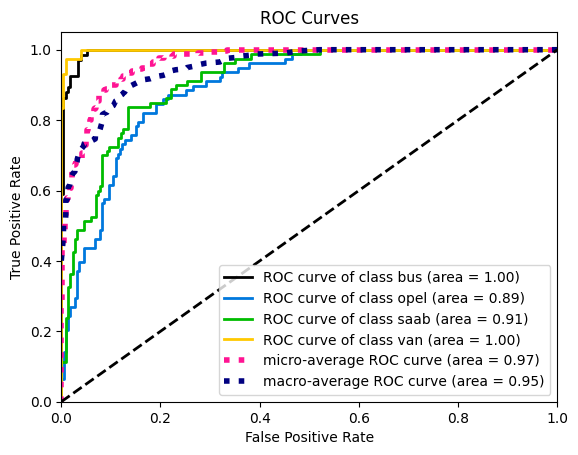

In [37]:
scikitplot.metrics.plot_roc(y_test, proba_test)

#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

In [38]:
DecTreeParamGrid = {'max_depth': np.arange(1, 25)}
DecTreeEstimator = sklearn.tree.DecisionTreeClassifier(random_state=1488)
DecTreeOptimizer = sklearn.model_selection.GridSearchCV(DecTreeEstimator, DecTreeParamGrid)

DecTreeOptimizer.fit(X_train_scaled, y_train)
print(DecTreeOptimizer.best_params_)

{'max_depth': 8}


In [40]:
DecTreeClsf = sklearn.tree.DecisionTreeClassifier(max_depth=DecTreeOptimizer.best_params_['max_depth'], random_state=1488).fit(X_train_scaled, y_train)

proba_test = LogRegClsf.predict_proba(X_test_scaled)
prediction = LogRegClsf.predict(X_test_scaled)

print("accuracy =", sklearn.metrics.accuracy_score(y_test, prediction))
print("f1 =", sklearn.metrics.f1_score(y_test, prediction, average='macro'))

accuracy = 0.8114478114478114
f1 = 0.8169414790563313


In [41]:
print(sklearn.metrics.classification_report(y_test, prediction))

              precision    recall  f1-score   support

         bus       0.89      0.95      0.92        66
        opel       0.69      0.65      0.67        78
        saab       0.71      0.70      0.70        80
         van       0.97      0.97      0.97        73

    accuracy                           0.81       297
   macro avg       0.81      0.82      0.82       297
weighted avg       0.81      0.81      0.81       297



<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

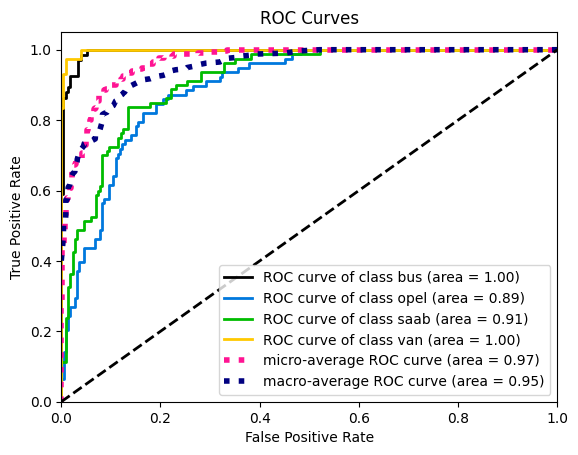

In [42]:
scikitplot.metrics.plot_roc(y_test, proba_test)

#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensebmle varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble? 

In [43]:
from tqdm import tqdm
import scipy

In [45]:
TrainForBags = np.hstack((X_train_pca, y_train[:, np.newaxis]))
AllTrainBags = np.array([sklearn.utils.resample(TrainForBags) for _ in range(100)])
print(AllTrainBags.shape)

(100, 549, 14)


In [48]:
LogRegModels  = []
DecTreeModels = []

ParamGridLogReg = {'C':  np.linspace(0.01, 100, 10), 'l1_ratio': np.linspace(0, 1, 10)}
LogRegEstimator = sklearn.linear_model.LogisticRegression(penalty='elasticnet', solver='saga', multi_class='multinomial', max_iter=1000, tol=1e-3, random_state=1488)
OptimizerLogReg = sklearn.model_selection.GridSearchCV(LogRegEstimator, ParamGridLogReg, n_jobs=-1)

ParamGridDecTree = {'max_depth': np.arange(1, 25)}
DecTreeEstimator = sklearn.tree.DecisionTreeClassifier(random_state=1488)
OptimizerDecTree = sklearn.model_selection.GridSearchCV(DecTreeEstimator, ParamGridDecTree, n_jobs=-1)

for bag in tqdm(AllTrainBags):
    OptimizerLogReg.fit(bag[:, :-1], bag[:, -1])
    OptimizerDecTree.fit(bag[:, :-1], bag[:, -1])

    LogRegClsf  = sklearn.linear_model.LogisticRegression(penalty='elasticnet', tol=1e-3, solver='saga', C=OptimizerLogReg.best_params_['C'], l1_ratio=OptimizerLogReg.best_params_['l1_ratio'], max_iter=1000, multi_class='multinomial', n_jobs=-1, random_state=1488).fit(bag[:, :-1], bag[:, -1])
    DecTreeClsf = sklearn.tree.DecisionTreeClassifier(max_depth=OptimizerDecTree.best_params_['max_depth'], random_state=1488).fit(bag[:, :-1], bag[:, -1])

    LogRegModels.append(LogRegClsf)
    DecTreeModels.append(DecTreeClsf)

100%|██████████| 100/100 [08:01<00:00,  4.81s/it]


In [49]:
LogRegPrediction  = np.array([model.predict(X_test_pca) for model in LogRegModels])
DecTreePrediction = np.array([model.predict(X_test_pca) for model in DecTreeModels])

In [68]:
#because scipy.stats.mode is depricated in scipy 1.11 let's release this function by our hands
def mode(a, axis=0):
    scores = np.unique(np.ravel(a))
    testshape = list(a.shape)
    testshape[axis] = 1
    oldmostfreq = np.zeros(testshape)
    oldcounts = np.zeros(testshape)

    for score in scores:
        template = (a == score)
        counts = np.expand_dims(np.sum(template, axis),axis)
        mostfrequent = np.where(counts > oldcounts, score, oldmostfreq)
        oldcounts = np.maximum(counts, oldcounts)
        oldmostfreq = mostfrequent

    return mostfrequent, oldcounts

In [69]:
EnsembleSizes = range(2, 100, 5)

AverageLogRegPrediction  = [np.ravel(mode(a=LogRegPrediction [:size], axis=0)[0]) for size in EnsembleSizes]
AverageDecTreePrediction = [np.ravel(mode(a=DecTreePrediction[:size], axis=0)[0]) for size in EnsembleSizes]

In [70]:
LogRegAccuracies = [sklearn.metrics.accuracy_score(y_test, prediction) for prediction in AverageLogRegPrediction]
LogRegf1         = [sklearn.metrics.f1_score(y_test, prediction, average='macro') for prediction in AverageLogRegPrediction]

DecTreeAccuracies = [sklearn.metrics.accuracy_score(y_test, prediction) for prediction in AverageDecTreePrediction]
DecTreef1         = [sklearn.metrics.f1_score(y_test, prediction, average='macro') for prediction in AverageDecTreePrediction]

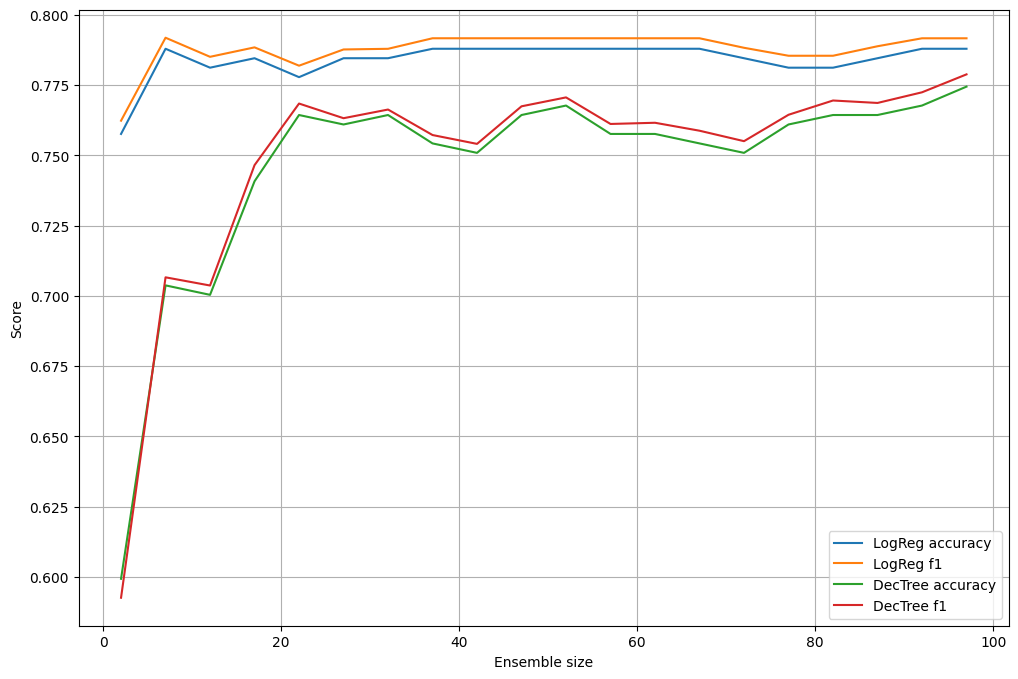

In [73]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.plot(EnsembleSizes, LogRegAccuracies, label='LogReg accuracy')
plt.plot(EnsembleSizes, LogRegf1, label='LogReg f1')
plt.plot(EnsembleSizes, DecTreeAccuracies, label='DecTree accuracy')
plt.plot(EnsembleSizes, DecTreef1, label='DecTree f1')
plt.legend()
plt.xlabel("Ensemble size")
plt.ylabel('Score')
plt.grid(':')
plt.show()

It is evident that the f1 score and accuracy of LogReg are nearly identical, both at 80%. However, the accuracy of decision tree increases. Trees are advantageous in ensembles as they are easy to retrain and highly dependent on the sample. Building more trees on bootstrapped samples and averaging their results improves their ability to capture general patterns in the data rather than specific cases. Unlike trees, LogReg has lower relevance for all 100 resampl's and around 30 would suffice.

Regarding optimal hyperparameters, it appears that they vary significantly depending on the sample. Prior to adding random_state to train_test_split, the order of C was completely different, indicating that the parameters may not be optimal for each resample.

#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

In [81]:
sizes = np.arange(2, 100, 5)
models = [sklearn.ensemble.RandomForestClassifier(n_estimators=i, random_state=1488, n_jobs=-1).fit(X_train_pca, y_train) for i in sizes]
predictions = [model.predict(X_test_pca) for model in models]

In [82]:
RFAccuracies = [sklearn.metrics.accuracy_score(y_test, prediction) for prediction in predictions]
RFf1 = [sklearn.metrics.f1_score(y_test, prediction, average='macro') for prediction in predictions]

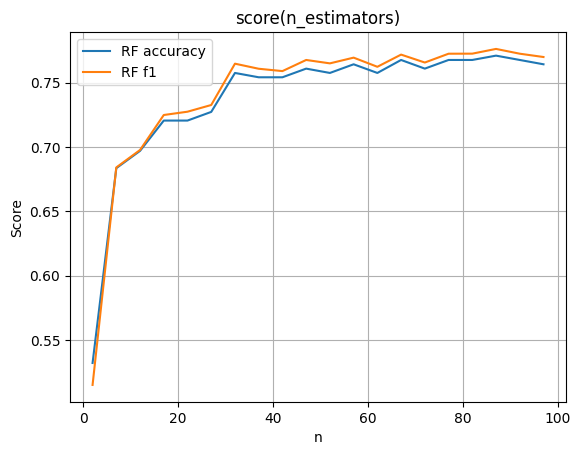

In [85]:
plt.plot(sizes, RFAccuracies, label='RF accuracy')
plt.plot(sizes, RFf1, label='RF f1')
plt.title('score(n_estimators)')
plt.xlabel("n")
plt.ylabel('Score')
plt.legend()
plt.grid(':')
plt.show()

As we can see - optimum in 35-85 trees and better parameter is 92, but from 35 plot shape is horizontally line.

#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it? 

In [93]:
def PlotEstimator(Estimator, EstimatorName):
    accuracy, f1, sizes, train_idx = [], [], [], []
    skf = sklearn.model_selection.StratifiedKFold(n_splits=10, shuffle=True, random_state = 1488)

    for train_index, test_index in skf.split(X_train_scaled, y_train):
        train_idx.extend(test_index)
        sizes.append(len(train_idx))
        Estimator.fit(X_train_scaled[train_idx], y_train[train_idx])
        predictions = Estimator.predict(X_test_scaled)
        accuracy.append(sklearn.metrics.accuracy_score(y_test, predictions))
        f1.append(sklearn.metrics.f1_score(y_test, predictions, average='macro'))

    plt.plot(sizes, accuracy, label=f'accuracy {EstimatorName}')
    plt.plot(sizes, f1, label=f'f1 {EstimatorName}')
    plt.title(f'score({EstimatorName})')
    plt.xlabel("size")
    plt.ylabel('Score')
    plt.legend()
    plt.grid(':')
    plt.show()

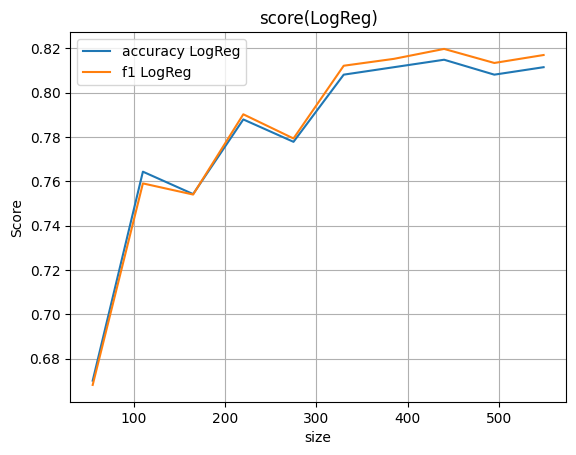

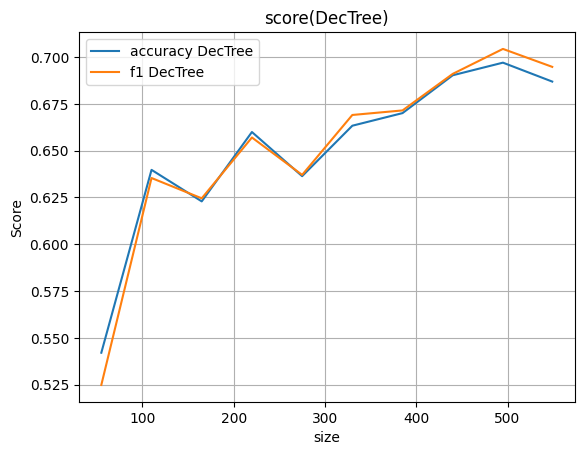

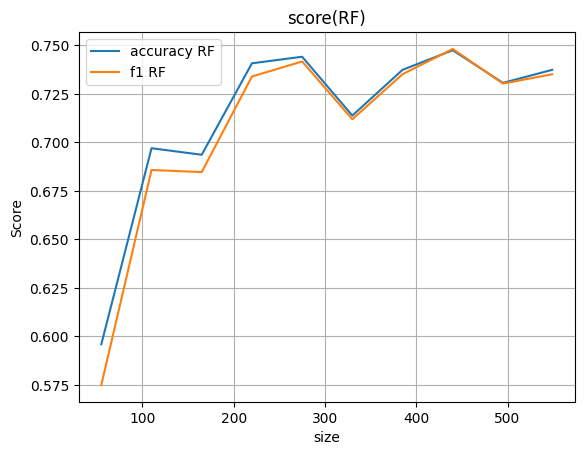

In [101]:
LogReg_best_params = LogRegOptimizer.best_params_
DecTree_best_params = DecTreeOptimizer.best_params_
RF_best_params = {'n_estimators': 92}

LogRegEstimator = sklearn.linear_model.LogisticRegression(tol=1e-3, solver='saga', max_iter=1000, multi_class='multinomial', penalty='elasticnet', n_jobs=-1, random_state=1488, C=LogReg_best_params['C'], l1_ratio=LogReg_best_params['l1_ratio'])
DecTreeEstimator = sklearn.tree.DecisionTreeClassifier(max_depth=DecTree_best_params['max_depth'], random_state=1488)
RFEstimator = sklearn.ensemble.RandomForestClassifier(n_estimators=RF_best_params['n_estimators'], random_state=1488, n_jobs=-1)

PlotEstimator(LogRegEstimator, 'LogReg')
PlotEstimator(DecTreeEstimator, 'DecTree')
PlotEstimator(RFEstimator, 'RF')

#### 2.9. Boosting
Your goal is to build a boosting ensemble using xgboost, CatBoost or lightgbm package.
Please, do not use the sklearn API for these models.

Find optimal number of decision trees in the boosting ensembe using grid search or other methods.
Please, explain your answer.

In [102]:
from xgboost import XGBClassifier

In [103]:
LabelEncoder = sklearn.preprocessing.LabelEncoder()
y_train_encoded = LabelEncoder.fit_transform(y_train)

model = XGBClassifier()
n_estimators = range(2, 100, 5)
ParamgGrid = dict(n_estimators=n_estimators)
kfold = sklearn.model_selection.StratifiedKFold(n_splits=10, shuffle=True, random_state=1488)
GridSearch = sklearn.model_selection.GridSearchCV(model, ParamgGrid, scoring="accuracy", n_jobs=-1, cv=kfold)
GridResult = GridSearch.fit(X_train_scaled, y_train_encoded)

print(GridResult.best_params_)

model = XGBClassifier(n_estimators=GridResult.best_params_['n_estimators']).fit(X_train_scaled, y_train_encoded)

prediction = LabelEncoder.inverse_transform(model.predict(X_test_scaled))

print("accuracy =", sklearn.metrics.accuracy_score(y_test, prediction))
print("f1 =", sklearn.metrics.f1_score(y_test, prediction, average='macro'))

{'n_estimators': 92}
accuracy = 0.7676767676767676
f1 = 0.7730671075544074
